In [1]:
import numpy as np
import pandas as pd
import player_information as pi
import match

## Creating an example for the blog post 

* Show that the greedy method of player selection can be misleading.
* Find an example match where selecting a player with the greedy method leads to a worse outcome than selecting using the minmax method.

In [22]:
import copy

# Create two random teams
team_A_df = pi.create_rand_team(5)
team_B_df = pi.create_rand_team(5)

# Set up a match where minmax will be used to select players on team A
match_mm = match.match(team_A_df, team_B_df)

# Make a copy of the match - in this instance the greedy method will be used to select the first player on team A
match_get_table = copy.deepcopy(match_mm)

# Ensure that team B selects the same (random) player in each case
match_mm.b_pick(method='random')
match_greedy = copy.deepcopy(match_mm)
match_greedy.a_pick(method='greedy')

print("Match matrix:")
print(match_mm.match_matrix_)

match_mm.a_pick(method='minmax')
print("MWP for R1:")
match_get_table.a_pick(method='minmax')
print(match_get_table.means)
match_mm.a_pick(method='minmax')
print("MWP for R2:")
print(match_mm.means)
match_mm.b_pick(method='random')
match_mm.b_pick(method='random')
match_mm.a_pick(method='minmax')
match_mm.a_pick(method='minmax')
match_mm.b_pick(method='random')
match_mm.b_pick(method='random')
match_mm.a_pick(method='minmax')
#match_mm.a_pick(method='minmax')

print("Simulated lineup")
print(match_mm.a_choices)
print(match_mm.b_choices)
print("Best theoretical lineup")
print([0,1,2,3,4])
print(match_mm.best_perm_)
print("Greedy algo choice for a R1:")
print(match_greedy.a_choices)
print(match_mm.mean_prob_)
print(match_mm.curr_probs_)
print(match_mm.perm_ranks())

Match matrix:
[[0.2744989  0.28408605 0.14200555 0.32594564 0.36305026]
 [0.53691884 0.46984087 0.26987993 0.59707199 0.56004635]
 [0.44689805 0.38179422 0.26114459 0.50803014 0.54898091]
 [0.15096483 0.15717212 0.07216693 0.23769502 0.21126987]
 [0.56016644 0.5718664  0.35778782 0.61944017 0.65737169]]
MWP for R1:
[[0.26959789 0.29425722 0.28033104 0.2633547  0.27575602]
 [0.28316084 0.27475253 0.26037094 0.27532833 0.28968423]
 [0.28498824 0.25304636 0.27202317 0.30658192 0.26665719]
 [0.26642166 0.29029119 0.27877752 0.27712742 0.27067909]
 [0.27912823 0.27094959 0.29179421 0.2609045  0.28052035]]
MWP for R2:
[[0.29949995 0.31823782 0.30778853 0.3008014 ]
 [0.31920224 0.299059   0.28788002 0.32018644]
 [0.29891349 0.31796701 0.31011466 0.29933254]
 [0.30871201 0.29106387 0.32054449 0.30600732]]
Simulated lineup
[3. 4. 0. 1. 2.]
[2. 4. 1. 3. 0.]
Best theoretical lineup
[0, 1, 2, 3, 4]
[0, 3, 4, 2, 1]
Greedy algo choice for a R1:
[ 4. nan nan nan nan]
0.2766593760660205
[0.32532261]
[

## Define functions for four different match scenarios

* only_a_a_first: Team a uses minmax, team b uses random, team a picks first.
* only_a_b_first: Team a uses minmax, team b uses random, team b picks first.
* both_a_first: Both teams use minmax, team a picks first.
* both_b_first: Both teams use minmax, team b picks first.

In [13]:
def only_a_a_first(m):

    mean0 = m.mean_prob_
    
    m.a_pick(method='minmax') #R1
    m.b_pick(method='random') #R1
    m.b_pick(method='random') #R2
    m.a_pick(method='minmax') #R2
    m.a_pick(method='minmax') #R3
    m.b_pick(method='random') #R3
    m.b_pick(method='random') #R4
    m.a_pick(method='minmax') #R4
    m.a_pick(method='minmax') #R5
    m.b_pick(method='random') #R4

    mean4 = m.curr_probs_[0]
    diff = mean4 - mean0
    
    return mean0, mean4, diff

def only_a_b_first(m):

    mean0 = m.mean_prob_
    
    m.b_pick(method='random') #R1
    m.a_pick(method='minmax') #R1
    m.a_pick(method='minmax') #R2
    m.b_pick(method='random') #R2
    m.b_pick(method='random') #R3
    m.a_pick(method='minmax') #R3
    m.a_pick(method='minmax') #R4
    m.b_pick(method='random') #R4
    m.b_pick(method='random') #R5
    m.a_pick(method='minmax') #R5

    mean4 = m.curr_probs_[0]
    diff = mean4 - mean0
    
    return mean0, mean4, diff

def both_b_first(m):

    mean0 = m.mean_prob_
    
    m.b_pick(method='minmax') #R1
    m.a_pick(method='minmax') #R1
    m.a_pick(method='minmax') #R2
    m.b_pick(method='minmax') #R2
    m.b_pick(method='minmax') #R3
    m.a_pick(method='minmax') #R3
    m.a_pick(method='minmax') #R4
    m.b_pick(method='minmax') #R4
    m.b_pick(method='minmax') #R5
    m.a_pick(method='minmax') #R5

    mean4 = m.curr_probs_[0]
    diff = mean4 - mean0
    
    return mean0, mean4, diff

def both_a_first(m):

    mean0 = m.mean_prob_
    
    m.a_pick(method='minmax') #R1
    m.b_pick(method='minmax') #R1
    m.b_pick(method='minmax') #R2
    m.a_pick(method='minmax') #R2
    m.a_pick(method='minmax') #R3
    m.b_pick(method='minmax') #R3
    m.b_pick(method='minmax') #R4
    m.a_pick(method='minmax') #R4
    m.a_pick(method='minmax') #R5
    m.b_pick(method='minmax') #R5

    mean4 = m.curr_probs_[0]
    diff = mean4 - mean0
    
    return mean0, mean4, diff

## For 1000 random matches simulate each possible selection scenario

In [15]:
botha = []
bothb = []
onlyaf = []
onlyas = []

for i in range(0, 1000):
    
    team_A_df = pi.create_rand_team(5)
    team_B_df = pi.create_rand_team(5)
    mba = match.match(team_A_df, team_B_df)
    m_a = copy.deepcopy(mba)
    mab = copy.deepcopy(mba)
    ma_ = copy.deepcopy(mba)
    
    mean_0, mean_end, diff_bothb = both_b_first(mba)
    mean_0, mean_end, diff_onlyaf = only_a_b_first(m_a)
    mean_0, mean_end, diff_botha = both_a_first(mab)
    mean_0, mean_end, diff_onlyas = only_a_a_first(ma_)
    botha.append(diff_botha)
    bothb.append(diff_bothb)
    onlyaf.append(diff_onlyaf)
    onlyas.append(diff_onlyas)

In [16]:
botha = np.array(botha)
bothb = np.array(bothb)

print(np.mean(botha))
print(np.mean(bothb))
print(len(botha[botha>0])/len(botha))
print(len(bothb[bothb<0])/len(bothb))

0.011698562332315433
-0.011706079602259391
0.719
0.733


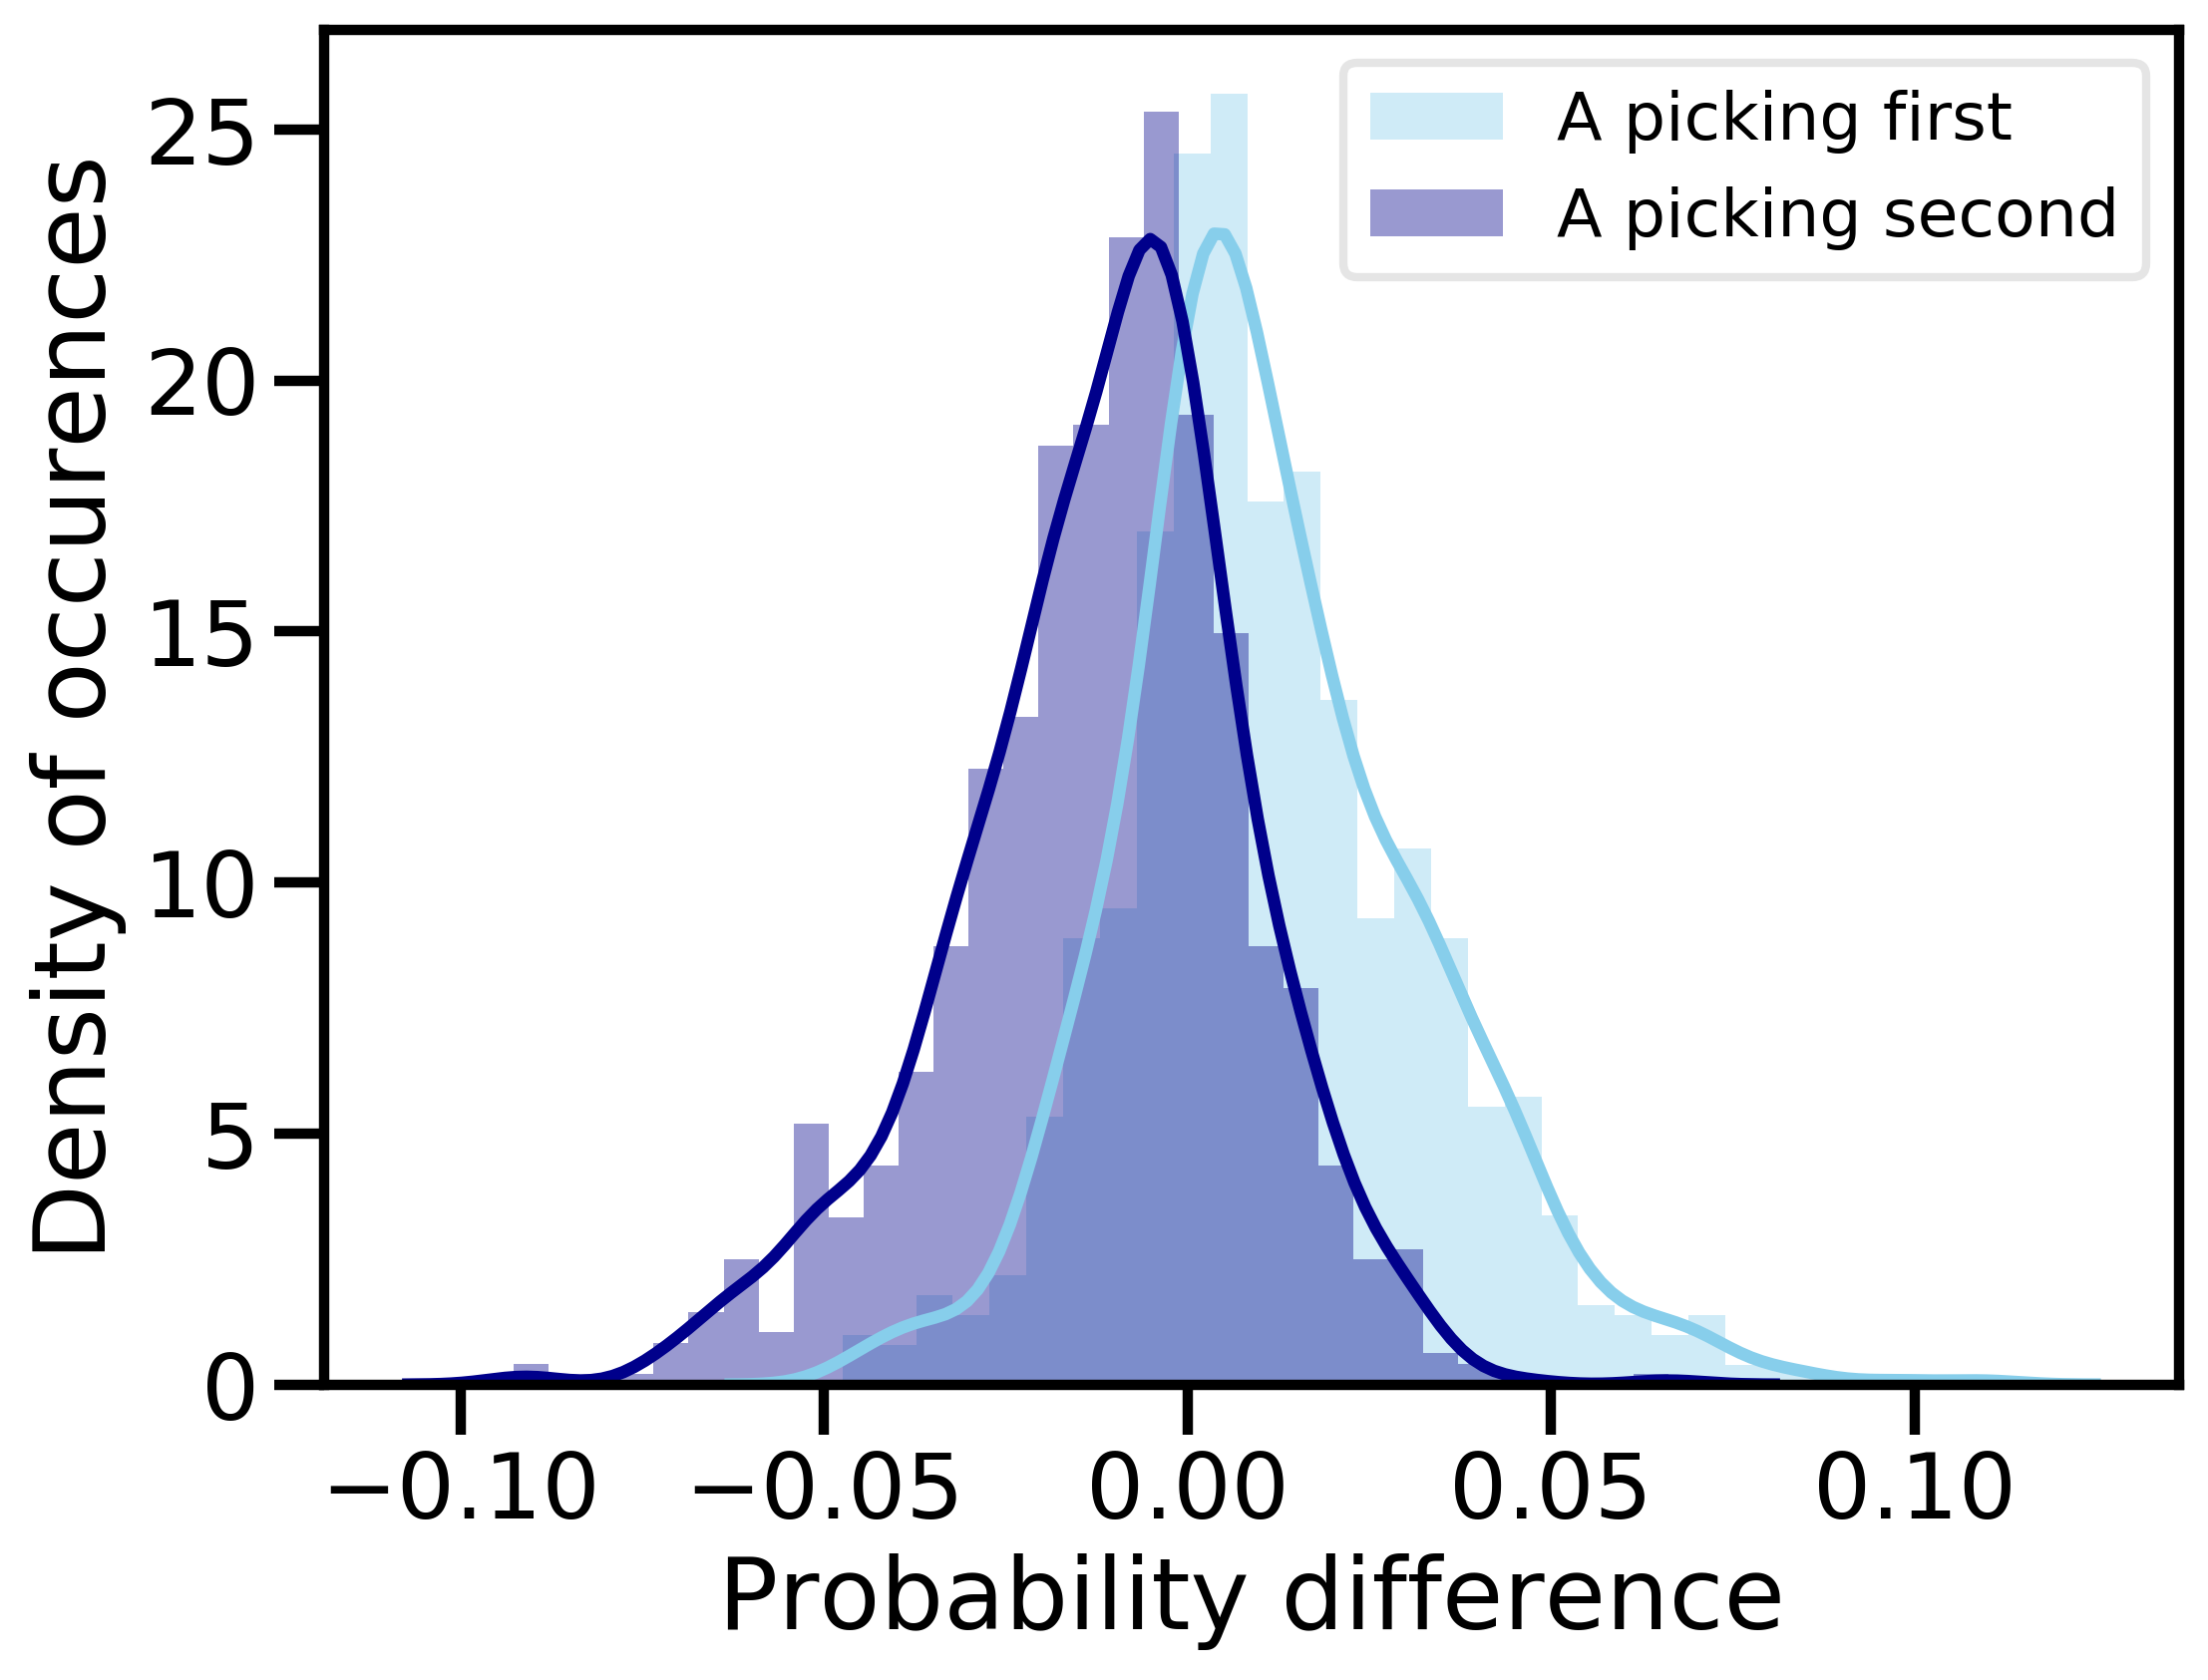

In [20]:
import seaborn as sb
import matplotlib.pyplot as plt
sb.set_context('poster')

fig = plt.subplots(figsize=(8,6), dpi=300)
sb.distplot(botha, color = 'skyblue')
sb.distplot(bothb, color = 'darkblue')
plt.xlabel('Probability difference', fontsize=24)
plt.ylabel('Density of occurences', fontsize=24)
plt.legend(['A picking first','A picking second'],frameon=True, framealpha=0.5, loc = 'upper right', fontsize=16)

__Comments:__ There is clearly a slight advantage to picking first in the first round when both teams use the minmax selection strategy.

## Confirming that there is no difference when between picking first and second when team B makes random choices

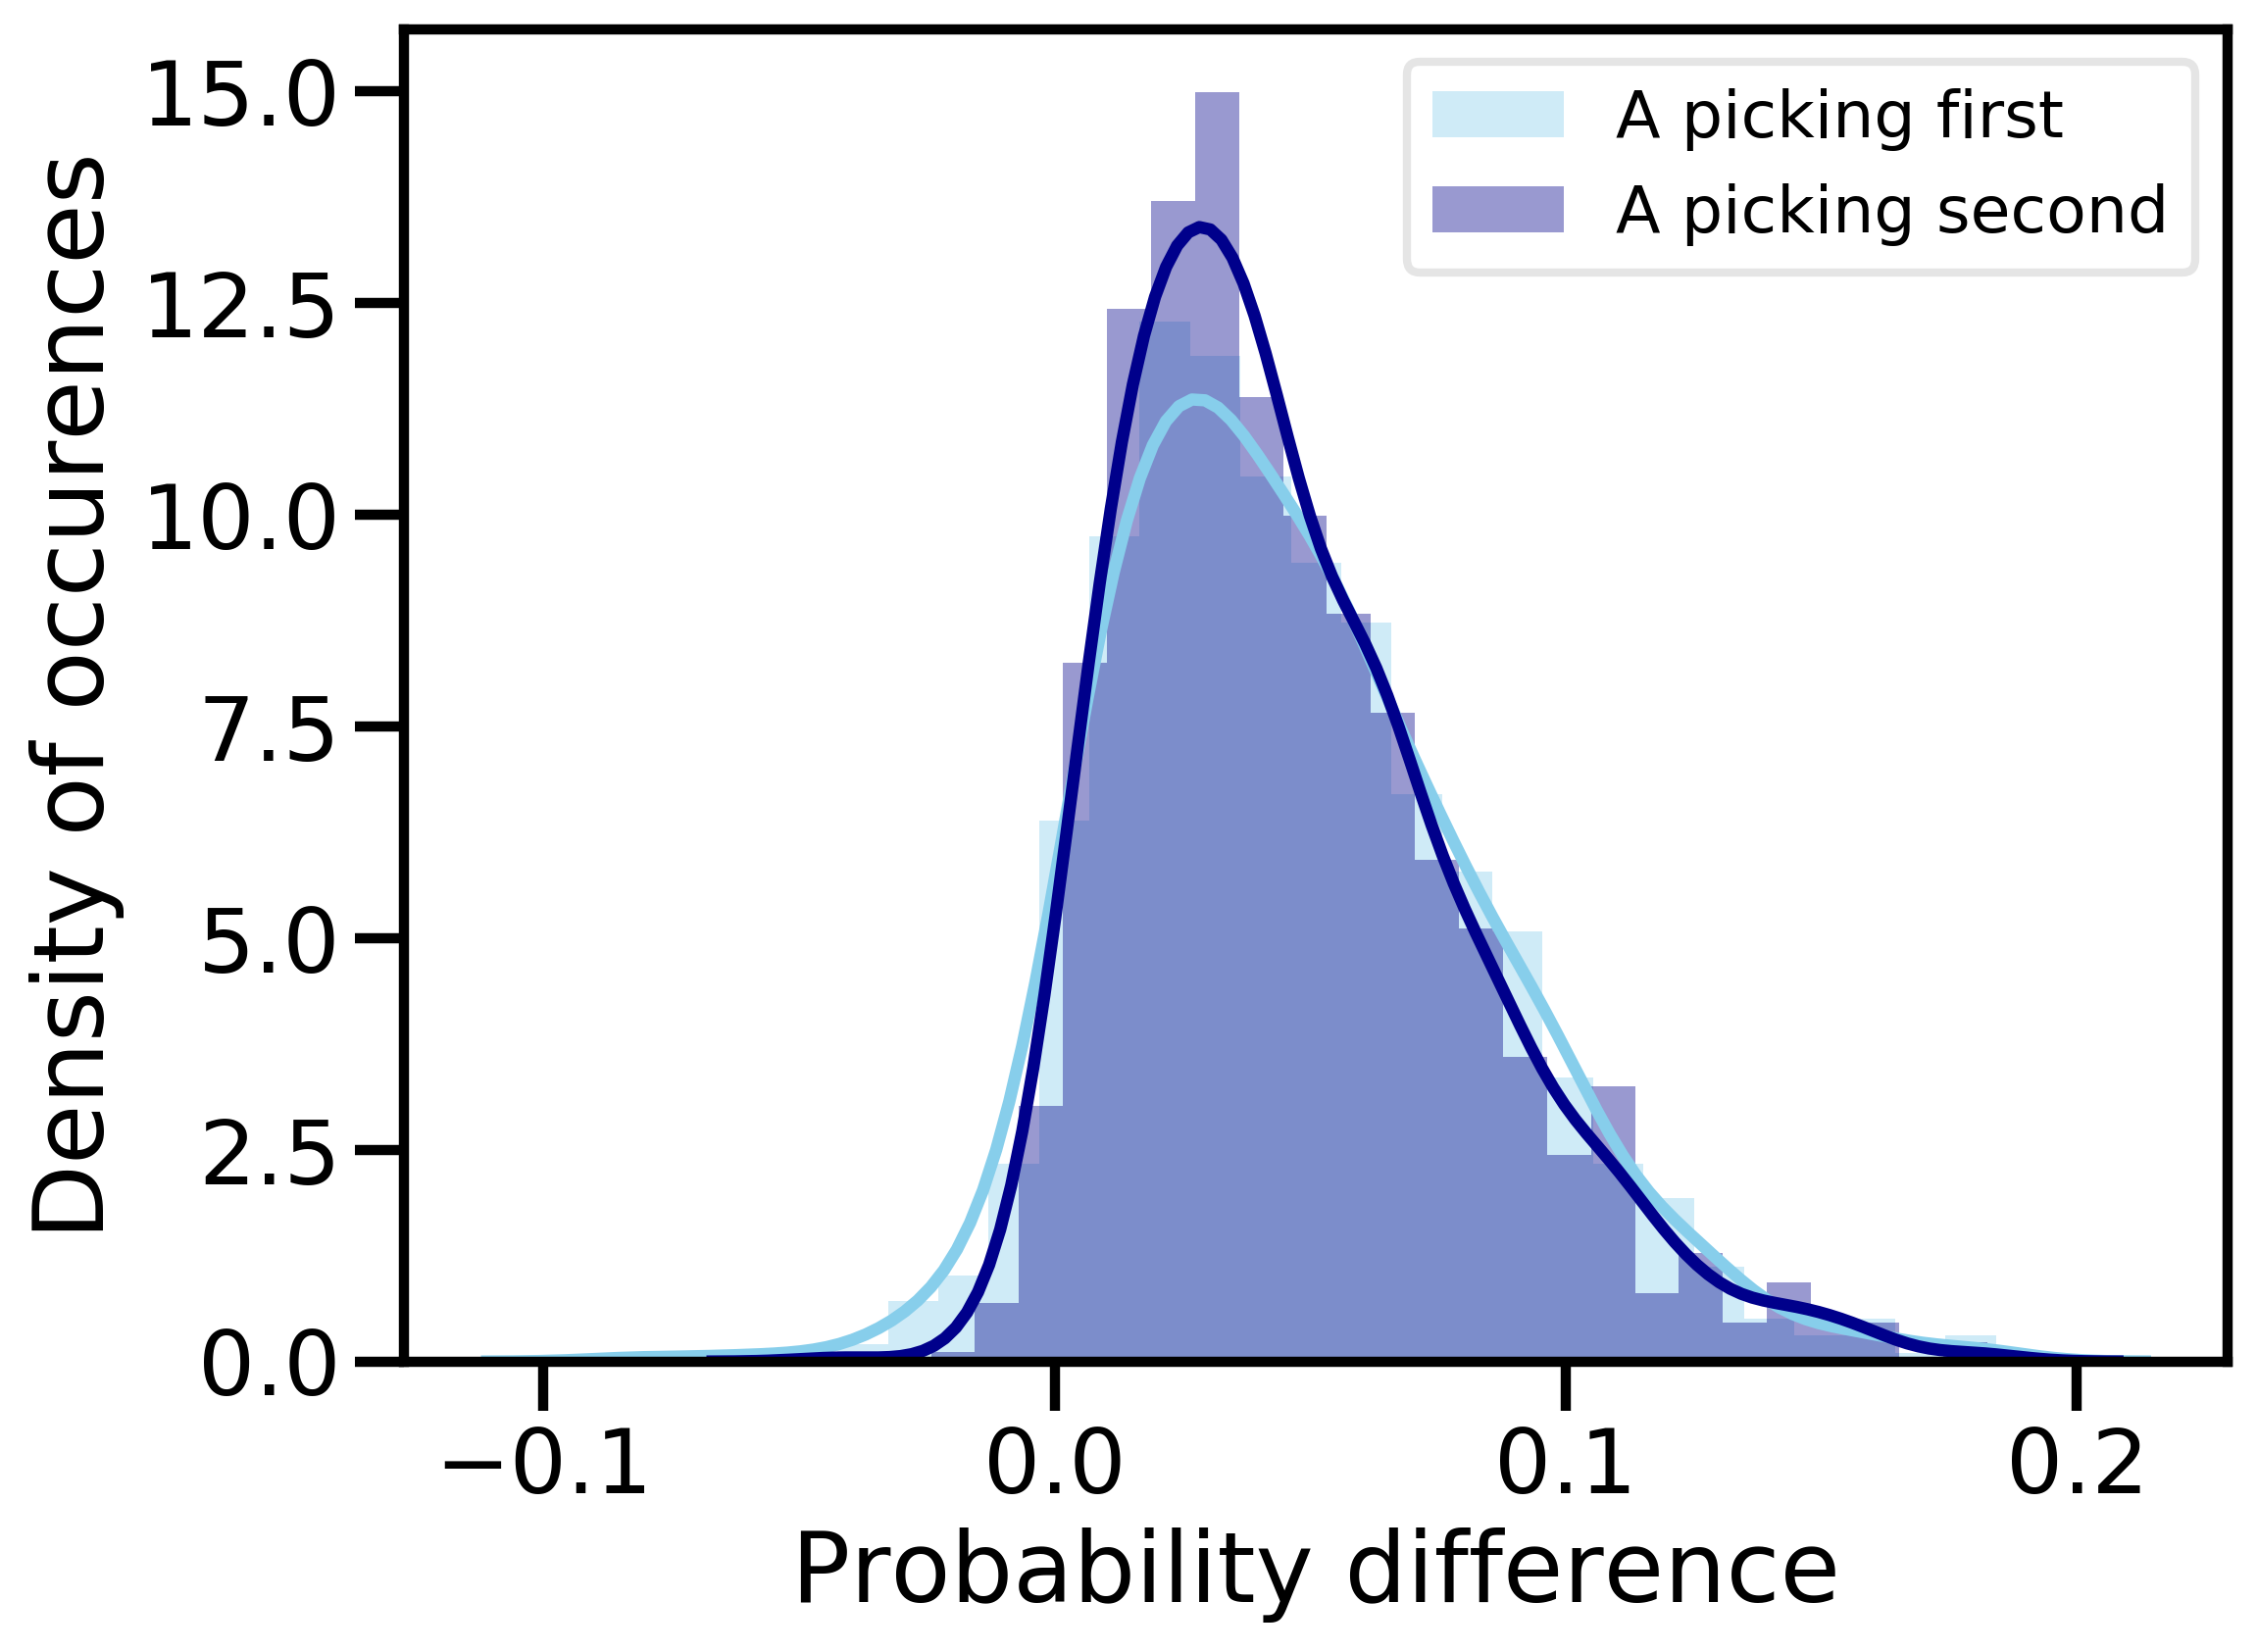

In [23]:
fig = plt.subplots(figsize=(8,6), dpi=300)
sb.distplot(onlyaf, color = 'skyblue')
sb.distplot(onlyas, color = 'darkblue')
plt.xlabel('Probability difference', fontsize=24)
plt.ylabel('Density of occurences', fontsize=24)
plt.legend(['A picking first','A picking second'],frameon=True, framealpha=0.5, loc = 'upper right', fontsize=16)

In [30]:
from scipy.stats import wilcoxon

print(wilcoxon(botha, bothb, alternative='greater'))
print(wilcoxon(onlyaf, onlyas))

WilcoxonResult(statistic=452266.0, pvalue=1.1836789427942527e-126)
WilcoxonResult(statistic=234537.0, pvalue=0.7021916238898516)
